<a href="https://colab.research.google.com/github/lindamukami/Carlifornia-house-pricing-dataset/blob/main/Carlifornia_housing_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#importing libraries that l will use for getting and exploring the data
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Getting the data

In [2]:
#Accessing the csv data
housing = pd.read_csv('housing.csv')

In [3]:
#get the top 5 rows
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41,880,129.0,322,126,8.3252,452600,NEAR BAY
1,-122.22,37.86,21,7099,1106.0,2401,1138,8.3014,358500,NEAR BAY
2,-122.24,37.85,52,1467,190.0,496,177,7.2574,352100,NEAR BAY
3,-122.25,37.85,52,1274,235.0,558,219,5.6431,341300,NEAR BAY
4,-122.25,37.85,52,1627,280.0,565,259,3.8462,342200,NEAR BAY


Explore the data

In [4]:
#know the no of rows and columns in the dataset
housing.shape

(20640, 10)

In [5]:
#see the columns with missing values
#include = 'all' allows for object data
housing.describe(include = 'all')

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,<1H OCEAN
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9136
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909,NaN
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874,NaN
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000,NaN
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000,NaN
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000,NaN
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000,NaN


In [6]:
#know the data types/count/columns
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  int64  
 3   total_rooms         20640 non-null  int64  
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  int64  
 6   households          20640 non-null  int64  
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  int64  
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(4), int64(5), object(1)
memory usage: 1.6+ MB


In [7]:
#check the unique categories on a column
housing['ocean_proximity'].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

In [8]:
#rule of thumps if the missing values are more than 50 % drop the entire column but for now l will keep the column and possibly fill in values through a pipeline
perc_null = (housing['total_bedrooms'].isnull().sum()/housing.shape[0])*100
print("The percentage of missing value is:") 
perc_null


The percentage of missing value is:


1.002906976744186

Some Visualization to get started .....

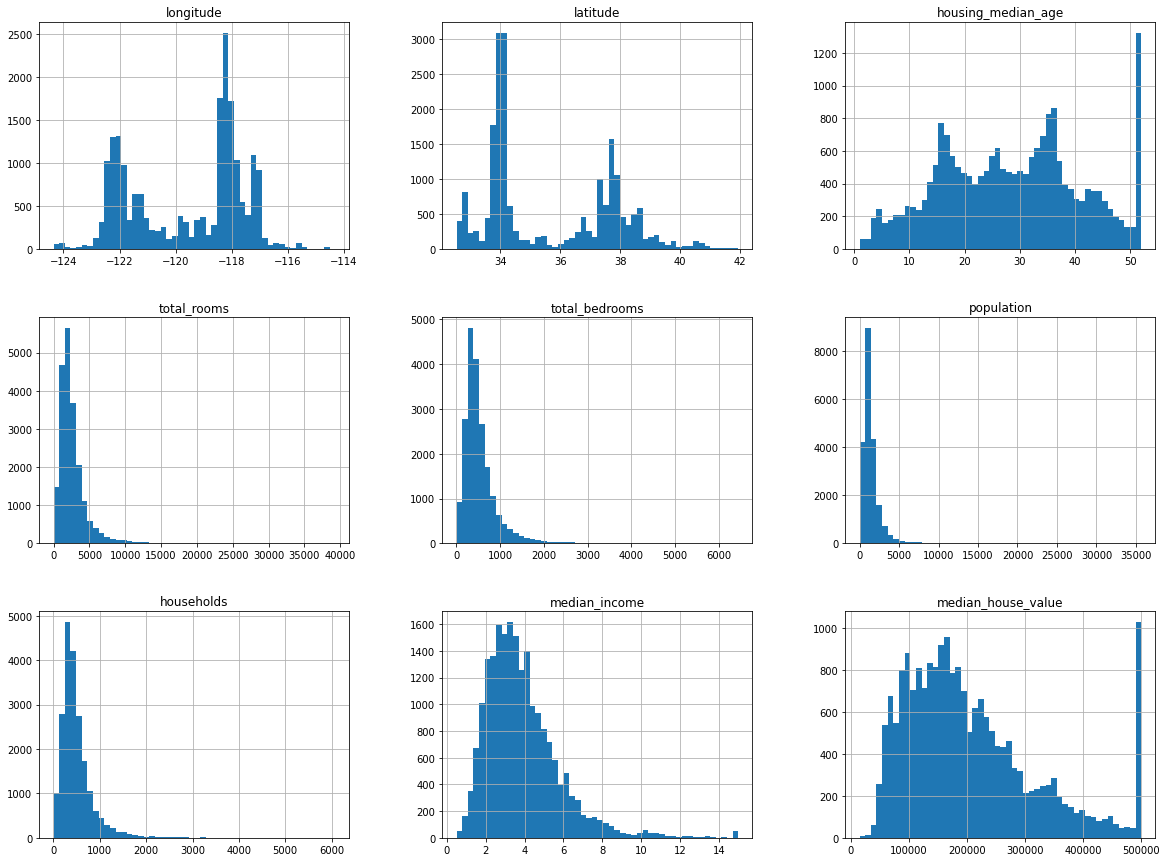

In [9]:
housing.hist(bins= 50,figsize=(20,15))
plt.show()

**From the histogram the following is observed:**

* median house value, housing median age and median income have blocks on    their values. This explains the high numbers on their right tail
* the different columns have different scales eg for median income is 0,2,4.. and for median house value is 100000,200000...
* we don't have a column of the ocean_proximity represented since the value type is object






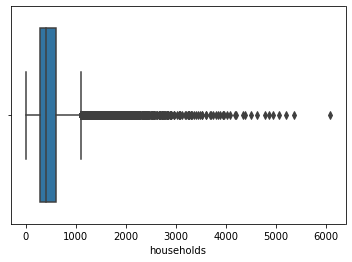

In [10]:
#univariate outlier analysis
sns.boxplot(x=housing['households'])

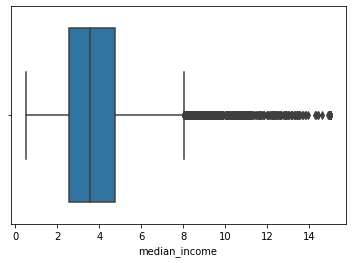

In [11]:
sns.boxplot(x=housing['median_income'])

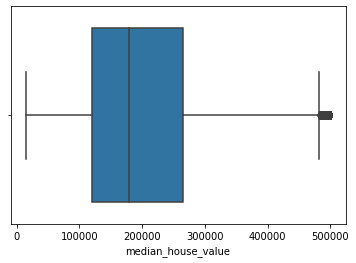

In [12]:
sns.boxplot(x=housing['median_house_value'])

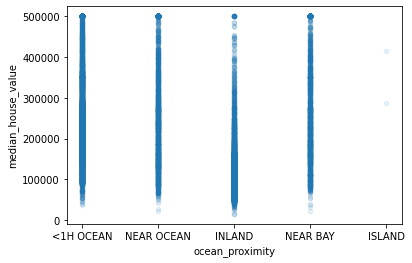

In [35]:
housing.plot(kind="scatter", x="ocean_proximity", y="median_house_value",
             alpha=0.1)


Split the data to prevent data snooping bias

median income is a very
important attribute to predict median housing prices. You may want to ensure that
the test set is representative of the various categories of incomes in the whole dataset

In [14]:
#spliting data through stratified sampling to ensure that data is well represented and no sampling biasness, using the column median_income


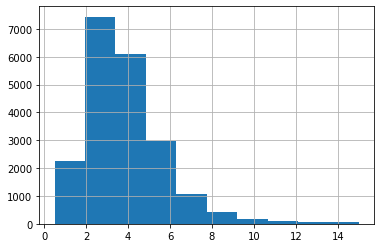

In [15]:
#let's view the column 'median income'
housing['median_income'].hist()
plt.show()

Values are represented till 15, most values range from 1.5 to 6


In [16]:
housing['in_cat']=np.ceil(housing['median_income']/1.5)

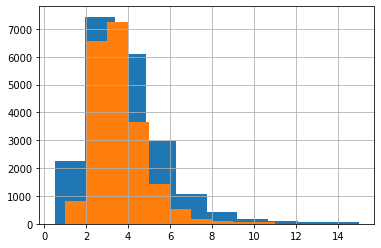

In [17]:
housing['median_income'].hist()
housing['in_cat'].hist()
plt.show()

In [18]:
housing['in_cat'].where(housing['in_cat']<5,5, inplace=True)

In [19]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,in_cat
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909,3.006686
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874,1.054618
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000,1.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000,2.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000,3.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000,4.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000,5.000000


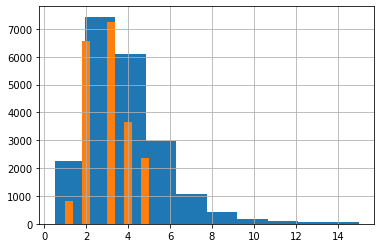

In [20]:
housing['median_income'].hist()
housing['in_cat'].hist()
plt.show()

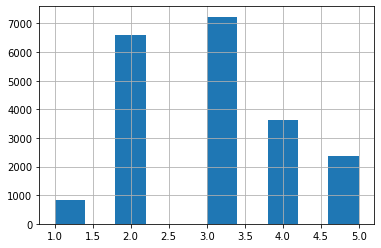

In [21]:
housing['in_cat'].hist()
plt.show()

In [22]:
#Pandas provide a unique method to retrieve rows from a Data frame. DataFrame. loc[] method is a method that takes only index labels and returns row or dataframe if the index label exists in the caller data frame.
from sklearn.model_selection import StratifiedShuffleSplit
split= StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
#split.split(X,y)
for train_index, test_index in split.split(housing, housing["in_cat"]):
  strat_train_set = housing.loc[train_index]
  strat_test_set = housing.loc[test_index]

In [23]:
#check for the error of stratified
strat = strat_test_set['in_cat'].value_counts()/len(strat_test_set['in_cat'])
strat

3.0    0.350533
2.0    0.318798
4.0    0.176357
5.0    0.114583
1.0    0.039729
Name: in_cat, dtype: float64

In [24]:
total = housing['in_cat'].value_counts()/len(housing['in_cat'])
total

3.0    0.350581
2.0    0.318847
4.0    0.176308
5.0    0.114438
1.0    0.039826
Name: in_cat, dtype: float64

In [25]:
strat_error = (strat-total)/(total)*100
strat_error

3.0   -0.013820
2.0   -0.015195
4.0    0.027480
5.0    0.127011
1.0   -0.243309
Name: in_cat, dtype: float64

In [26]:
#drop the in_cat column, as we have already achieved stratified sampling
for set_ in (strat_train_set,strat_test_set):
  set_.drop('in_cat',axis=1, inplace=True)


In [27]:
housing.head(2)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,in_cat
0,-122.23,37.88,41,880,129.0,322,126,8.3252,452600,NEAR BAY,5.0
1,-122.22,37.86,21,7099,1106.0,2401,1138,8.3014,358500,NEAR BAY,5.0


In [28]:
housing = strat_train_set.copy()

In [29]:
housing.head(2)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
17606,-121.89,37.29,38,1568,351.0,710,339,2.7042,286600,<1H OCEAN
18632,-121.93,37.05,14,679,108.0,306,113,6.4214,340600,<1H OCEAN


In [30]:
#we mentioned that median income was important attribute in telling the median house value, to see this use correlation
corr_matrix =housing.corr() 

In [31]:
corr_matrix['median_house_value'].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.687160
total_rooms           0.135097
housing_median_age    0.114110
households            0.064506
total_bedrooms        0.047689
population           -0.026920
longitude            -0.047432
latitude             -0.142724
Name: median_house_value, dtype: float64

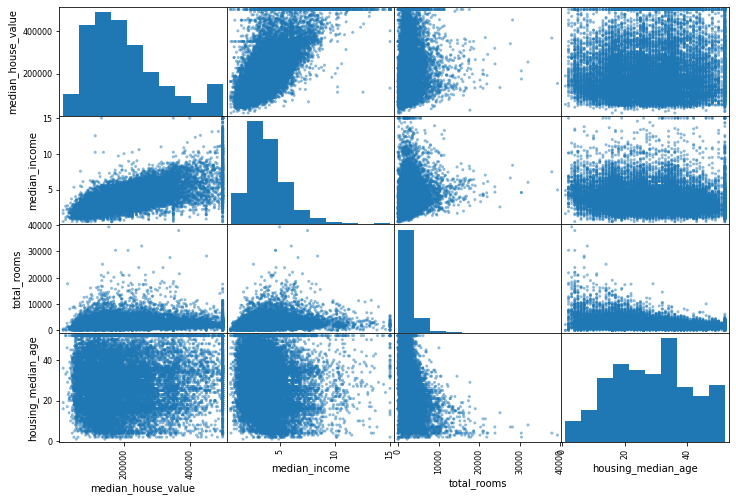

In [32]:
#different way to see correlation using scatter matrix
#check the top 3 highly correlating to median house value
from pandas.plotting import scatter_matrix
attributes = ["median_house_value","median_income","total_rooms","housing_median_age"]
scatter_matrix(housing[attributes], figsize=(12,8))
plt.show()

(0.0, 16.0, 0.0, 550000.0)

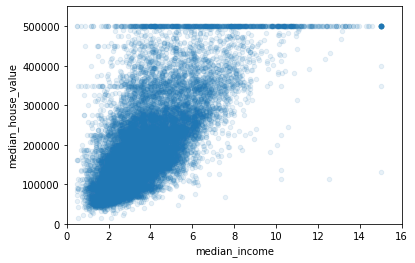

In [33]:
housing.plot(kind="scatter", x="median_income", y="median_house_value",
             alpha=0.1)
plt.axis([0, 16, 0, 550000])

Some feature engineering then perform correlation

In [36]:
housing["rooms_per_household"] = housing["total_rooms"]/housing["households"]
housing["bedrooms_per_room"] = housing["total_bedrooms"]/housing["total_rooms"]
housing["population_per_household"]=housing["population"]/housing["households"]

In [38]:
corr_matrix = housing.corr()
corr_matrix['median_house_value'].sort_values(ascending=False)
#noticed rooms per household has a high correlation compared to total bedrooms

median_house_value          1.000000
median_income               0.687160
rooms_per_household         0.146285
total_rooms                 0.135097
housing_median_age          0.114110
households                  0.064506
total_bedrooms              0.047689
population_per_household   -0.021985
population                 -0.026920
longitude                  -0.047432
latitude                   -0.142724
bedrooms_per_room          -0.259984
Name: median_house_value, dtype: float64

In [39]:
housing.head(2)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,rooms_per_household,bedrooms_per_room,population_per_household
17606,-121.89,37.29,38,1568,351.0,710,339,2.7042,286600,<1H OCEAN,4.625369,0.223852,2.094395
18632,-121.93,37.05,14,679,108.0,306,113,6.4214,340600,<1H OCEAN,6.008850,0.159057,2.707965


In [41]:
strat_train_set.head(2)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
17606,-121.89,37.29,38,1568,351.0,710,339,2.7042,286600,<1H OCEAN
18632,-121.93,37.05,14,679,108.0,306,113,6.4214,340600,<1H OCEAN


Prepare data for training for this l will use a pipeline, this will help me fit the transformation to the training data only.

In [44]:
#separate target variable/labels
housing = strat_train_set.drop("median_house_value", axis=1) 
housing_labels = strat_train_set["median_house_value"].copy()

In [45]:
#custom transformer
from sklearn.base import BaseEstimator, TransformerMixin

# column index
rooms_ix, bedrooms_ix, population_ix, households_ix = 3, 4, 5, 6

class CombinedAttributesAdder(BaseEstimator, TransformerMixin):
    def __init__(self, add_bedrooms_per_room=True): # no *args or **kargs
        self.add_bedrooms_per_room = add_bedrooms_per_room
    def fit(self, X, y=None):
        return self  # nothing else to do
    def transform(self, X):
        rooms_per_household = X[:, rooms_ix] / X[:, households_ix]
        population_per_household = X[:, population_ix] / X[:, households_ix]
        if self.add_bedrooms_per_room:
            bedrooms_per_room = X[:, bedrooms_ix] / X[:, rooms_ix]
            return np.c_[X, rooms_per_household, population_per_household,
                         bedrooms_per_room]
        else:
            return np.c_[X, rooms_per_household, population_per_household]

attr_adder = CombinedAttributesAdder(add_bedrooms_per_room=False)
housing_extra_attribs = attr_adder.transform(housing.values)

In [46]:
col_names = "total_rooms", "total_bedrooms", "population", "households"
rooms_ix, bedrooms_ix, population_ix, households_ix = [
    housing.columns.get_loc(c) for c in col_names] # get the column indices

In [47]:
#pipeline dealing with numeric variables
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler#standardizaation
from sklearn.impute import SimpleImputer #fill in missing values
housing_num = housing.drop("ocean_proximity", axis=1) #drop the categorical feature

num_pipeline = Pipeline([
        ('imputer', SimpleImputer(strategy="median")),#fill in missing values through median
        ('attribs_adder', CombinedAttributesAdder()), #applying the new features added with custom transformer
        ('std_scaler', StandardScaler()), 
    ])

housing_num_tr = num_pipeline.fit_transform(housing_num)

In [48]:
#combining pipeline for numeric and categorical
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
num_attribs = list(housing_num)#constructor requires a list
cat_attribs = ["ocean_proximity"]#constructor requires a list

full_pipeline = ColumnTransformer([
        ("num", num_pipeline, num_attribs),
        ("cat", OneHotEncoder(), cat_attribs),#transforms categorical features to numeric
    ])

housing_prepared = full_pipeline.fit_transform(housing)

Training & Testing the data

In [49]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(housing_prepared, housing_labels)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [50]:
from sklearn.metrics import mean_squared_error

housing_predictions = lin_reg.predict(housing_prepared)
lin_mse = mean_squared_error(housing_labels, housing_predictions)
lin_rmse = np.sqrt(lin_mse)
lin_rmse

68628.19819848923

In [51]:
from sklearn.tree import DecisionTreeRegressor
tree_reg = DecisionTreeRegressor(random_state=42)
tree_reg.fit(housing_prepared, housing_labels)


DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=42, splitter='best')

In [52]:
housing_predictions= tree_reg.predict(housing_prepared)
tree_mse = mean_squared_error(housing_labels,housing_predictions)
tree_rmse = np.sqrt(tree_mse)
tree_rmse

0.0

The model overfit's with decision tree regressor

In [53]:
#using cross validation
from sklearn.model_selection import cross_val_score

scores = cross_val_score(tree_reg, housing_prepared, housing_labels,
                         scoring="neg_mean_squared_error", cv=10)
tree_rmse_scores = np.sqrt(-scores)

In [57]:
def display_scores(scores):
    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("Standard deviation:", scores.std())

display_scores(tree_rmse_scores)

Scores: [70194.33680785 66855.16363941 72432.58244769 70758.73896782
 71115.88230639 75585.14172901 70262.86139133 70273.6325285
 75366.87952553 71231.65726027]
Mean: 71407.68766037929
Standard deviation: 2439.4345041191004


In [58]:
lin_scores = cross_val_score(lin_reg, housing_prepared, housing_labels,
                             scoring="neg_mean_squared_error", cv=10)
lin_rmse_scores = np.sqrt(-lin_scores)
display_scores(lin_rmse_scores)

Scores: [66782.73843989 66960.118071   70347.95244419 74739.57052552
 68031.13388938 71193.84183426 64969.63056405 68281.61137997
 71552.91566558 67665.10082067]
Mean: 69052.46136345083
Standard deviation: 2731.674001798344


linear regression performs better than decision tree regressor

In [59]:
from sklearn.ensemble import RandomForestRegressor
forest_reg = RandomForestRegressor(n_estimators=100, random_state=42)
forest_reg.fit(housing_prepared, housing_labels)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=42, verbose=0, warm_start=False)

In [60]:
housing_predictions = forest_reg.predict(housing_prepared)
forest_mse = mean_squared_error(housing_labels, housing_predictions)
forest_rmse = np.sqrt(forest_mse)
forest_rmse

18603.515021376355

In [61]:
from sklearn.model_selection import cross_val_score

forest_scores = cross_val_score(forest_reg, housing_prepared, housing_labels,
                                scoring="neg_mean_squared_error", cv=10)
forest_rmse_scores = np.sqrt(-forest_scores)
display_scores(forest_rmse_scores)

Scores: [49519.80364233 47461.9115823  50029.02762854 52325.28068953
 49308.39426421 53446.37892622 48634.8036574  47585.73832311
 53490.10699751 50021.5852922 ]
Mean: 50182.303100336096
Standard deviation: 2097.0810550985693


Model performs better with random forest